# 線形回帰
## 課題1

In [20]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    train_data1 = pd.read_csv('week6/data/temp_ene.csv')
except FileNotFoundError:
    train_data1 = pd.read_csv('./data/temp_ene.csv')

x = train_data1['temp'].values.reshape(-1, 1)
y = train_data1['ene'].values.reshape(-1, 1)

線形回帰モデルによる予測$\hat{y}$は、特徴量ベクトル$\mathbf{x}$とパラメータベクトル{\mathbf{\theta}}$の内積と考えることができる。
$$  
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = \boldsymbol{\theta} \cdot \boldsymbol{x}  
$$
バイアス項$\theta_0$を用いるために特徴量ベクトルに$x_0=1$を追加する必要がある事に留意する。　<br>
これはscikit-learnのadd_dummy_featureを使えば実装できる。

In [21]:
from sklearn.preprocessing import add_dummy_feature
x_original = x.copy()
x = add_dummy_feature(x, value=1)

インスタンス数を$m$とすると、特徴量を格納したサイズ$m×(n+1)$の行列$\mathbf{X}$とターゲット値を格納したベクトル$\mathbf{y}$を用いて平均二乗誤差(Mean Square Error)は
$$
MSE(\mathbf{X}, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \boldsymbol{\theta}^\mathsf{T} \boldsymbol{x}^{(i)} - y^{(i)} \right)^2= \frac{1}{m}\|\mathbf{X} \boldsymbol{\theta} -\mathbf{y}\|^2
$$
と表せる。<br>
損失関数 $MSE(\boldsymbol{\theta})$ の $\boldsymbol{\theta}$ による勾配（偏微分）は

$$
\frac{\partial MSE(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} \propto \mathbf{X}^\top (\mathbf{X} \boldsymbol{\theta}-\mathbf{y})
$$
となるため、損失関数が最小となる最適なパラメータは
$$
\boldsymbol{\theta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$
と計算できる。これはpythonの行列演算により実装できる。

In [22]:
best_theta = np.linalg.inv(x.T @ x) @ x.T @ y
print(f"Best theta: {best_theta}")
y_pred = x @ best_theta

Best theta: [[-37.89032132]
 [  1.52262384]]


In [24]:
# 上の値がScikit-learnの結果と一致することを確認
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(x, y)
print(f"Scikit-learn theta: {model.coef_.T}")

Scikit-learn theta: [[-37.89032132]
 [  1.52262384]]


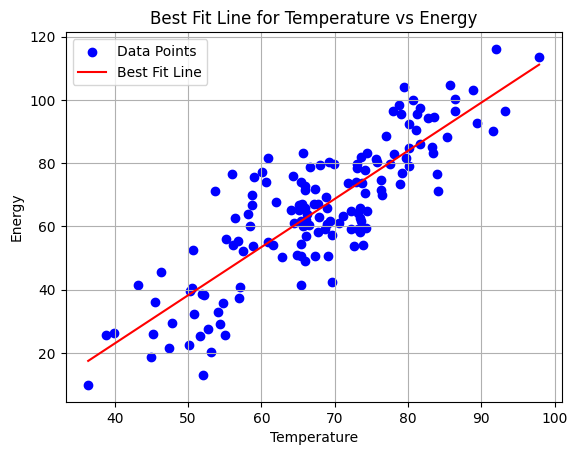

In [23]:
# モデルの図示
plt.scatter(x_original, y, label='Data Points', color='blue')
plt.plot(x_original, y_pred, label='Best Fit Line', color='red')
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.title('Best Fit Line for Temperature vs Energy')
plt.legend()
plt.grid()
plt.show()